In [138]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# make plot figures in the browser, no pop up figures
%matplotlib inline 

In [139]:
# Importing the dataset
dataset = pd.read_csv('cars.csv')
# print(dataset.columns)
# print(dataset.columns[:-1])
X = dataset[dataset.columns[:-1]]
# X = dataset.iloc[:, :-1] # we remove the column

print(X.dtypes)
X = X.apply(pd.to_numeric, errors='coerce')

print(X.dtypes)
X.head()

# X.to_csv('carsnew1.csv')

mpg             float64
 cylinders        int64
 cubicinches     object
 hp               int64
 weightlbs       object
 time-to-60       int64
 year             int64
dtype: object
mpg             float64
 cylinders        int64
 cubicinches    float64
 hp               int64
 weightlbs      float64
 time-to-60       int64
 year             int64
dtype: object


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [140]:
# Eliminating null values

for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))


    


for i in X.columns:
    print(X[i].isnull().sum())
    

print(np.all(np.isnan(X))) 

# X.to_csv('carsnew2.csv')

0
0
0
0
0
0
0
False


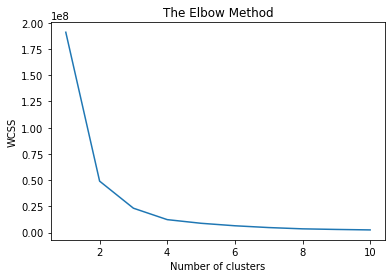

In [141]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []


kmeans = KMeans(n_clusters=0,init='k-means++',max_iter=300,n_init=10,random_state=0)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
# Apply K-Means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
X.insert(0,"K-Means",y_kmeans)
print(X)



[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0]
     K-Means   mpg   cylinders   cubicinches   hp   weightlbs   time-to-60  \
0          2  14.0           8         350.0  165      4209.0           12   
1          1  31.9           4          89.0   71      1925.0           14   
2          0  17.0           8         302.0  140      3449.0           11   
3          2  15.0           8         400.0  150      3761.0           10   
4          1  30.5           4          98.0   63      2051.0           17   
.

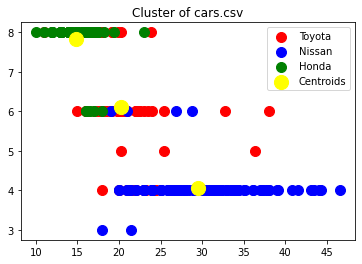

In [146]:
df1 = X.loc[X["K-Means"] == 0]
df2 = X.loc[X["K-Means"] == 1]
df3 = X.loc[X["K-Means"] == 2]
# df1.loc[:,["mpg"]]
# df1.iloc[:,1]    
# plt.scatter(df1.loc[:,["mpg"]],df1.loc[:,["cylinders"]], s=100, c='red', label='Toyota')
plt.scatter(df1.iloc[:,1] ,df1.iloc[:,2] , s=100, c='red', label='Toyota')
plt.scatter(df2.iloc[:,1] ,df2.iloc[:,2] , s=100, c='blue', label='Nissan')
plt.scatter(df3.iloc[:,1] ,df3.iloc[:,2] , s=100, c='green', label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200, c='yellow', label='Centroids')
plt.title('Cluster of cars.csv')
plt.legend()
plt.show()